In this file I start by implementing a compressed sensing reconstruction approach. I want to have a well accepted classical method 
as a baseline for my later deep learning models.

In [1]:
import sys
import os

sys.path.append('../scripts')
sys.path.append('../models')

os.environ["CUDA_VISIBLE_DEVICES"]= '2' #, this way I would choose GPU 3 to do the work

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from data_preparation import *
from output_statistics import *

In [17]:
# GM = np.zeros((22,22,21,6))
# WM = np.zeros((22,22,21,6))

# for i in range(0,6):
#     GM[..., i] = np.load(f'fn_vb_DMI_CRT_P0{i+3}/GM_mask.npy')
#     WM[..., i] = np.load(f'fn_vb_DMI_CRT_P0{i+3}/WM_mask.npy')
    
# np.save('GM_masks.npy', GM)
# np.save('WM_masks.npy', WM)

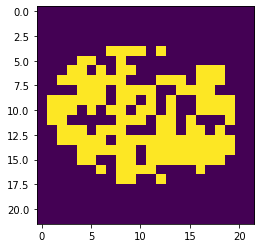

In [16]:
# plt.imshow(WM[:,:,10,1]+GM[:,:,10,1])

1. Loading data

In [ ]:
# mat_data_4 = loadmat('fn_vb_DMI_CRT_P04/CombinedCSI_full_rank.mat')

#mat_data = loadmat('fn_vb_DMI_CRT_P08/CombinedCSI_full_rank.mat')
# mat_data_3 = loadmat('fn_vb_DMI_CRT_P08/CombinedCSI_LR_8_P03.mat')
# mat_data_4 = loadmat('CombinedCSI_LR_8_P04.mat')
# mat_data_5 = loadmat('CombinedCSI_LR_8_P05.mat')
# mat_data_6 = loadmat('CombinedCSI_LR_8_P06.mat')
# mat_data_7 = loadmat('CombinedCSI_LR_8_P07.mat')
# mat_data_8 = loadmat('CombinedCSI_LR_8_P08.mat')

# # #Data= np.load('combined_trancuated_k_space_low_rank_15.npy')[..., -1]
# # #mat_data = loadmat('P08_Low_Rank_Spectral_Fit/CombinedCSI.mat')

# csi_3 = mat_data_3['csi']
# csi_4 = mat_data_4['csi']
# csi_5 = mat_data_5['csi']
# csi_6 = mat_data_6['csi']
# csi_7 = mat_data_7['csi']
# csi_8 = mat_data_8['csi']

# Data_3 = csi_3['Data'][0,0]
# Data_4 = csi_4['Data'][0,0]
# Data_5 = csi_5['Data'][0,0]
# Data_6 = csi_6['Data'][0,0]
# Data_7 = csi_7['Data'][0,0]
# Data_8 = csi_8['Data'][0,0]

# Data_4 = csi_4['Data'][0,0]
# Data_8 = csi_8['Data'][0,0]

#np.save('Low_Rank_8.npy', Data)

Combined_Full_Rank = np.load("Ground_Truth/Full_Rank/Full_Rank_All.npy")
Combined_Low_Rank = np.load("Ground_Truth/Archiv/Low_Rank_8_P03-P08.npy")

#Data = np.stack((Data_3, Data_4, Data_5, Data_6, Data_7, Data_8), axis=-1)
#np.save('Combined_Low_Rank_8.npy', Data)
#Data= np.load('combined_trancuated_k_space_full_rank.npy')

#Under_Sampled_AF_3 = np.load('Undersampled_Data/combined_undersampled_possoin_3D_fixed_r0_AF_3.npy')
#Under_Sampled_AF_5 = np.load('Undersampled_Data/combined_undersampled_possoin_3D_fixed_r0_AF_5.npy')

In [8]:
Combined_Low_Rank.shape

(22, 22, 21, 96, 8, 6)

In [5]:
Data_3.shape

(22, 22, 21, 96, 8)

In [11]:
Rank = "Full"

if Rank == "Full":
    Data = Combined_Full_Rank[..., 0]
else: 
    Data = Combined_Low_Rank[..., 0]
    
#Data = np.swapaxes(Data, -1, -2)

#Data = csi_3['Data'][0,0]
DataSize = Data.shape  # e.g., (X, Y, Z, T, W)
UsedRank = 8

reshaped_data = Data.reshape(
    DataSize[0]*DataSize[1]*DataSize[2]*DataSize[3],
    DataSize[4]
)

# -- Perform SVD (economy-size) --
#    np.linalg.svd returns U, S, Vh such that reshaped_data = U @ diag(S) @ Vh
U, S, Vh = np.linalg.svd(reshaped_data, full_matrices=False)

# -- Truncate to the desired rank --
U_trunc = U[:, :UsedRank]                # shape: (N, UsedRank)
S_trunc = np.diag(S[:UsedRank])          # shape: (UsedRank, UsedRank)
Vh_trunc = Vh[:UsedRank, :]             # shape: (UsedRank, M)

# -- Reconstruct with rank = UsedRank --
#    Note: In MATLAB, the code has conj(V)'; np.linalg.svd already provides Vh = V^H for complex data.
low_rank_approx = U_trunc @ S_trunc @ Vh_trunc

S_trunc

Data_new2 = low_rank_approx.reshape(DataSize)

In [17]:
np.abs(Data_new[0,0,10,0,1])

4697.3164

In [16]:
np.abs(Data_new2[0,0,10,1,0])

#plt.imshow(np.abs(Data_new2[:,:,10,1,0]))

7591.926

In [15]:
Data = Combined_Low_Rank[..., 0]
Data = np.swapaxes(Data, -1, -2)

#Data = csi_3['Data'][0,0]
DataSize = Data.shape  # e.g., (X, Y, Z, T, W)
UsedRank = 8

reshaped_data = Data.reshape(
    DataSize[0]*DataSize[1]*DataSize[2]*DataSize[3],
    DataSize[4]
)

# -- Perform SVD (economy-size) --
#    np.linalg.svd returns U, S, Vh such that reshaped_data = U @ diag(S) @ Vh
U, S, Vh = np.linalg.svd(reshaped_data, full_matrices=False)

# -- Truncate to the desired rank --
U_trunc = U[:, :UsedRank]                # shape: (N, UsedRank)
S_trunc = np.diag(S[:UsedRank])          # shape: (UsedRank, UsedRank)
Vh_trunc = Vh[:UsedRank, :]             # shape: (UsedRank, M)

# -- Reconstruct with rank = UsedRank --
#    Note: In MATLAB, the code has conj(V)'; np.linalg.svd already provides Vh = V^H for complex data.
low_rank_approx = U_trunc @ S_trunc @ Vh_trunc

S_trunc

Data_new = low_rank_approx.reshape(DataSize)

print(S_trunc)

[[8109158.        0.        0.        0.        0.        0.        0.
        0. ]
 [      0.  2229334.5       0.        0.        0.        0.        0.
        0. ]
 [      0.        0.  1436254.2       0.        0.        0.        0.
        0. ]
 [      0.        0.        0.  1241672.1       0.        0.        0.
        0. ]
 [      0.        0.        0.        0.   896997.6       0.        0.
        0. ]
 [      0.        0.        0.        0.        0.   844327.1       0.
        0. ]
 [      0.        0.        0.        0.        0.        0.   749926.2
        0. ]
 [      0.        0.        0.        0.        0.        0.        0.
   718524.4]]


2. Fourier Transform

In [ ]:
rank = 8

data = Data[:,:,:,:,:,0]
under_Sampled_AF_3 = Under_Sampled_AF_3[:,:,:,:,:,0]
under_Sampled_AF_5 = Under_Sampled_AF_5[:,:,:,:,:,0]

Low_Rank_Data_AF_3 = low_rank(data = under_Sampled_AF_3, rank = rank)
Low_Rank_Data_AF_5 = low_rank(data = under_Sampled_AF_5, rank = rank)
Low_Rank_Data = low_rank(data = data, rank = rank)

In [ ]:
norm_values_test = np.ones((96,8))  ## dont check normalization

plot_general_statistics(Low_Rank_Data_AF_5, Low_Rank_Data_AF_3, Low_Rank_Data, 96, norm_values_test)
plot_general_statistics_PSNR(Low_Rank_Data_AF_5, Low_Rank_Data_AF_3, Low_Rank_Data, 96, norm_values_test)
plot_general_statistics_SSIM(Low_Rank_Data_AF_5, Low_Rank_Data_AF_3, Low_Rank_Data, 96, norm_values_test)

In [ ]:
t = 60
T=7

comparison_Plot_3D_vs_Ifft(Low_Rank_Data, Low_Rank_Data_AF_3, Low_Rank_Data_AF_5, t, T, domain="spectral")